<div dir='ltr'><font face="B Zar" size=5>
Import Libraries
</font></div>

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from math import *

<div dir='ltr'><font face="B Zar" size=5>
Load image by cv2 and convert it to RGB. then plot it via matlotlib library.
</font></div>

In [13]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1z5hzDt_2vTXW-Wp6q5RAHXLL743ZaLqM' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1z5hzDt_2vTXW-Wp6q5RAHXLL743ZaLqM" -O dog.jpeg && rm -rf /tmp/cookies.txt

--2022-11-14 17:50:01--  https://docs.google.com/uc?export=download&confirm=&id=1z5hzDt_2vTXW-Wp6q5RAHXLL743ZaLqM
Resolving docs.google.com (docs.google.com)... 108.177.96.139, 108.177.96.113, 108.177.96.101, ...
Connecting to docs.google.com (docs.google.com)|108.177.96.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mtnf79o7u97ikjta83l3bt8ugqr6pc3m/1668448200000/01865608280713457520/*/1z5hzDt_2vTXW-Wp6q5RAHXLL743ZaLqM?e=download&uuid=c0e0dd2c-5fbc-416a-80db-20ca6465a787 [following]
--2022-11-14 17:50:02--  https://doc-0c-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/mtnf79o7u97ikjta83l3bt8ugqr6pc3m/1668448200000/01865608280713457520/*/1z5hzDt_2vTXW-Wp6q5RAHXLL743ZaLqM?e=download&uuid=c0e0dd2c-5fbc-416a-80db-20ca6465a787
Resolving doc-0c-64-docs.googleusercontent.com (doc-0c-64-docs.googleusercontent.com)... 108.177.126.132, 

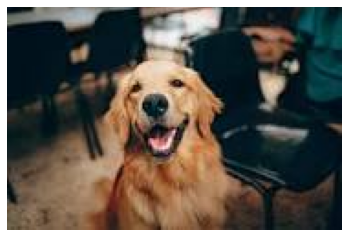

In [14]:
img=cv2.imread('dog.jpeg')
#img=cv2.resize(img,(50,50))
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
#img = cv2.resize(img, (16,16))
plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis('off')
plt.show()

In [15]:
img.shape

(122, 183, 3)

<div dir='ltr'>
<h2>
Introduction
</h2>
</div> 
<hr/>


<div dir='ltr'font-size='20px'>
The purpose of this notebook is to segmant the given pic using meanshift and kde. to continue a basic underastanding of meanshift and kde is crucial.
</div> 


<div dir='ltr'>
<h2>
Segmentation
</h2>
</div> 
<hr/>


<div dir='ltr'font-size='20px'>
In computer vision, segmentation is to segment a digital picture to different parts. parts that are similar to each other (super pixels). this is helpful for detecting objects and edges.
</div> 
<br/>
<div dir='ltr'font-size='20px'>
In other words, segmentation labels each pixel in a way that pixels with same labels have same features.so basically we can use clustering algorithms like meanshift for segmentation.
</div>


<div dir='ltr'>
<h2>
Meanshift
</h2>
</div> 
<hr/>


<div dir='ltr'font-size='20px'>
In mathematics, meanshift is a way for finding maxima in density functions. meanshift wants to find mode in a probability density function(pdf).
</div> 
<br/>
<div dir='ltr'font-size='20px'>
meanshift starts with a random place x with naighbours n(x).
consider function K, K for finding the maxima shows what naighbours are more imoirtant than the others, K gives weight to naighbours n(x).
</div>

<br/>
<div dir='ltr'font-size='20px'>
K is named kernel in mathematics, a weighting function.
kernel has different types. for finding new place after shifting x m(x), meanshifts uses the below equation:
</div>

$$
m(x) = \frac{\sum_{x_i}^{n(x)} K(x_i - x)x_i}{\sum_{x_i}^{n(x)} K(x_i - x)}
$$

<br/>
<div dir='ltr'font-size='20px'>
m(x) which is a weighted sum of naighbours with weights provided by kernel, is a new guess instead of x.repeat the algorithm to meet termination criteria which is m(x)-x is pretty samll.
</div>
<br/>
<div dir='ltr'font-size='20px'>
meanshift uses guessian kernel. guessian kernel:
</div>
$$
K(x-x_i) = \frac{1}{\sqrt{2\pi}\sigma} e^{-(x-x_i)^2/2\sigma^2}
$$

<div dir='ltr'>
<h2>
Kernel Density Estimation
</h2>
</div> 
<hr/>


<div dir='ltr'font-size='20px'>
Kernel density estimation is a method to estimate the probabilty density function of a random variable based on kernels as weights.
</div> 
<br/>
<div dir='ltr'font-size='20px'>
Let (x1, x2, ..., xn) be independent and identically distributed samples drawn from some univariate distribution with an unknown density ƒ at any given point x. We are interested in estimating the shape of this function ƒ. Its kernel density estimator is: 
</div>
$$
f_h(x) = \frac{1}{nh} \sum_{i=1}^{n}K(\frac{x-x_i}{h})
$$
<br/>
<div dir='ltr'font-size='20px'>
where K is the kernel — a non-negative function — and h > 0 is a smoothing parameter called the bandwidth.
A range of kernel functions are commonly used like Gaussian.
</div>

<br/>
<div dir='ltr'font-size='20px'>
we have seen Gaussian kernel fomula in the above section, which σ is the bandwith h. kde using Gaussian kernel :
</div>

$$
K(x-x_i) = \frac{1}{nh\sqrt{2\pi}} e^{-(x-x_i)^2/2h^2}
$$

<br/>
<div dir='ltr'font-size='20px'>
choosing right bandwith h is crucial. A rule-of-thumb bandwidth estimator: 
</div>

$$
0.9\text{ } min\begin{pmatrix}
\sigma,\frac{IQR}{1.34}
\end{pmatrix} n^{\frac{-1}{5}}
$$


<div dir='ltr'>
<h2>
Implementation
</h2>
</div> 
<hr/>
<h3>
important functions in code:
</h3>

<div dir='ltr'font-size='20px'>
1- show_histogram function computes image histograms for 3 channels RGB and also a gray level histogram.
</div>
<br/>
<div dir='ltr'font-size='20px'>
2- KDE_Gaussian_Kernel is a function for kde. KDE_Gaussian_Kernel is apllied on RGB histograms to results the probability density function (pdf) for red, green, blue histograms.
</div>


<div dir='ltr'font-size='20px'>
3- find_suitable_bandwith_h is to find best bandwith h using bandwidth estimator formula.
</div>
<br/>
<div dir='ltr'font-size='20px'>
4- build_cluster_suitable_dtst is applied on output of KDE_Gaussian_Kernel and changes its dimension from 1D to 2D by adding x-dimension(0-255) to axis 0 and kde output as axis 1. build_cluster_suitable_dtst is applied before mean_shift function because mean_shift need 2D input.
</div>
<br/>
<div dir='ltr'font-size='20px'>
5- mean_shift function is the implementation of mean_shift algorithm. it uses Gaussian Kernel to get weights to update points. mean_shift function is applied on output of build_cluster_suitable_dtst(2D output of KDE_Gaussian_Kernel) for red,green, blue.
</div>
<br/>
<div dir='ltr'font-size='20px'>
6- average_clusters function is applied to mean_shift outputs to find center of every cluster in red, green, blue. centers are computer by averaging in each cluster.
</div>
<br/>
<div dir='ltr'font-size='20px'>
7- segment_image function is applied to average_clusters outputs and original image to segment image. segment_image compares each px red, green, blue channel value with the centers of clusters and assign value of a center to that px which is closer to the px value.
</div>

<div dir='ltr'><font face="B Zar" size=5>
For Kernel Density 
</font></div>

In [16]:
def show_histogram(img,bins,is_rgb=True):
  
  if is_rgb:
    plt.figure(figsize=(30,18))
    plt.subplot(3,1,1)
    hist_red=np.histogram(img[:,:,0].ravel(),bins)
    plt.title('red histogrm',fontsize='20')
    plt.bar(np.linspace(0,255,bins),hist_red[0],color='r')

    plt.subplot(3,1,2)
    hist_green=np.histogram(img[:,:,1].ravel(),bins)
    plt.title('green histogrm',fontsize='20')
    plt.bar(np.linspace(0,255,bins),hist_green[0],color='g')

    plt.subplot(3,1,3)
    hist_blue=np.histogram(img[:,:,2].ravel(),bins)
    plt.title('blue histogrm',fontsize='20')
    plt.bar(np.linspace(0,255,bins),hist_blue[0],color='b')
    plt.show()
    return hist_red,hist_green,hist_blue
  if not is_rgb:
    plt.figure(figsize=(30,10))
    hist=np.histogram(cv2.cvtColor(img.copy(),cv2.COLOR_BGR2GRAY).ravel(),bins)
    plt.title('graylevel histogrm',fontsize='20')
    plt.bar(np.linspace(0,255,bins),hist[0],color='k')
    plt.show()
    return hist

  



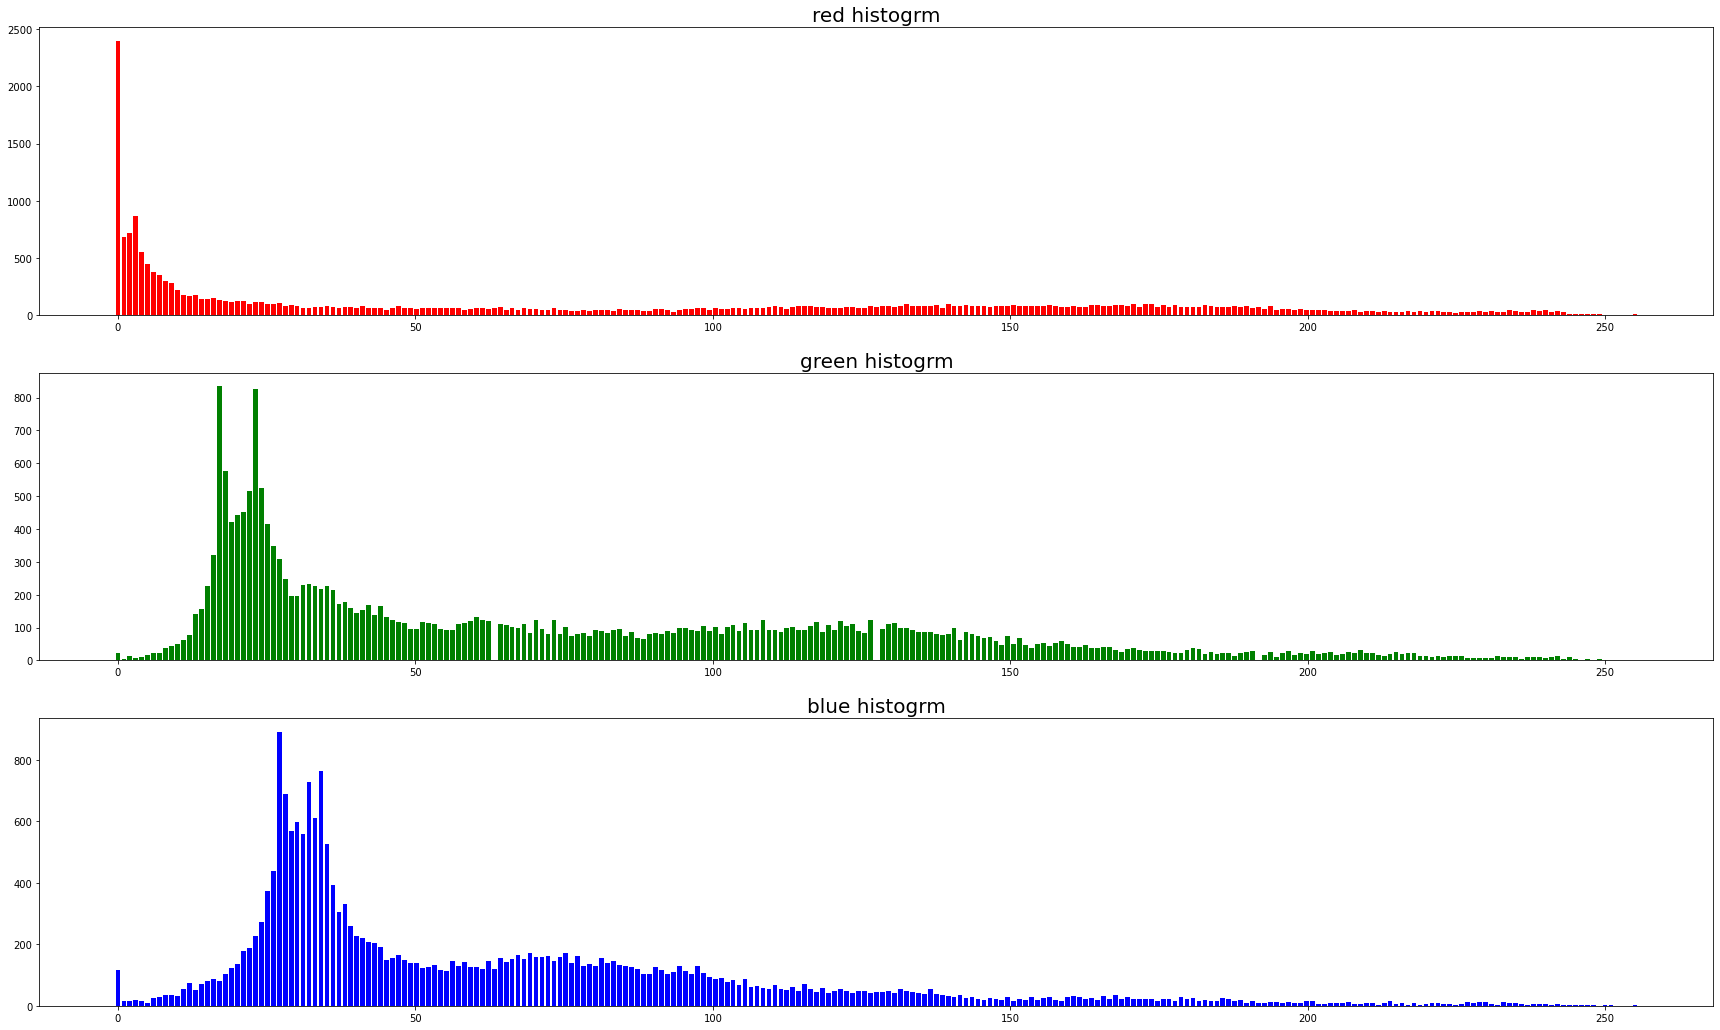

In [17]:
#rgb histaograms
r_hist,g_hist,b_hist=show_histogram(img,255,True)

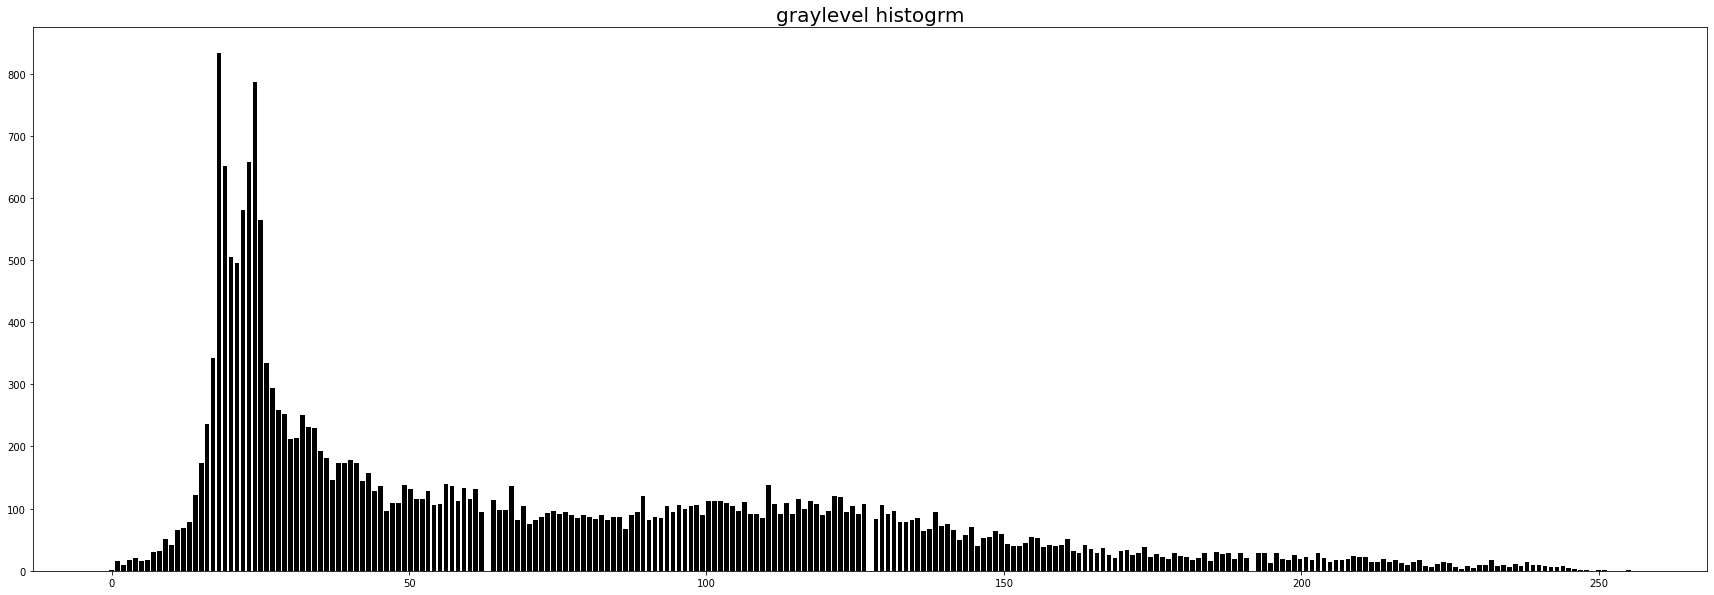

In [18]:
#gray level histogram
gray_hist=show_histogram(img,255,False)

In [19]:
def show_KDE_plot(data,title,color):
  plt.figure(figsize=(10,8))
  plt.title(title,fontsize='20')
  plt.plot(data,color=color)
  plt.show()

In [20]:
def KDE_Gaussian_Kernel(x,data,bandwith_h):
  # x is a single bin in histogram
  n=len(data)
  kde=0
  kde=(1/(sqrt(2*np.pi)*bandwith_h*n)) *np.sum((np.exp((-1/2)*np.power((x-data)/bandwith_h,2))))
  return kde


In [21]:
def find_suitable_bandwith_h(data,n_bins):
  standard_dv=np.std(data)
  q1,q3=np.percentile(data,[25,75])
  iqr=q3-q1
  bandwith_h=0.9 * min(standard_dv,iqr/1.34) * pow(n_bins,-1/5)
  return bandwith_h

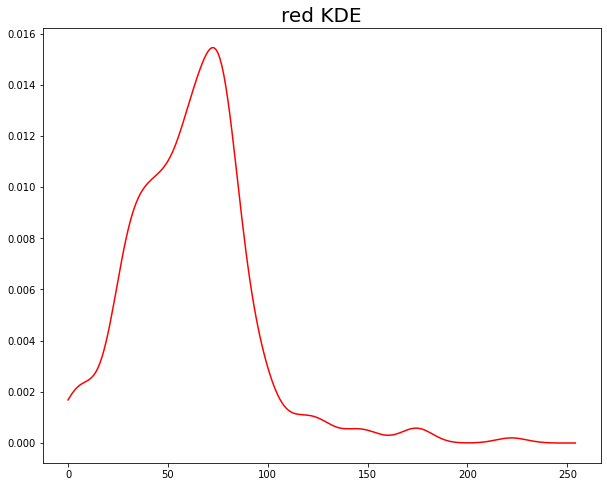

In [22]:
xdim_kde = np.arange(0,255,1)

# KDE on red
h_red=find_suitable_bandwith_h(r_hist[0],255)
red_kde_out = np.array([KDE_Gaussian_Kernel(x,r_hist[0],h_red) for x in xdim_kde])
#red_kde_out = np.array([KDE_Gaussian_Kernel(x,img[:,:,0],h_red) for x in xdim_kde])
show_KDE_plot(red_kde_out,'red KDE','r')

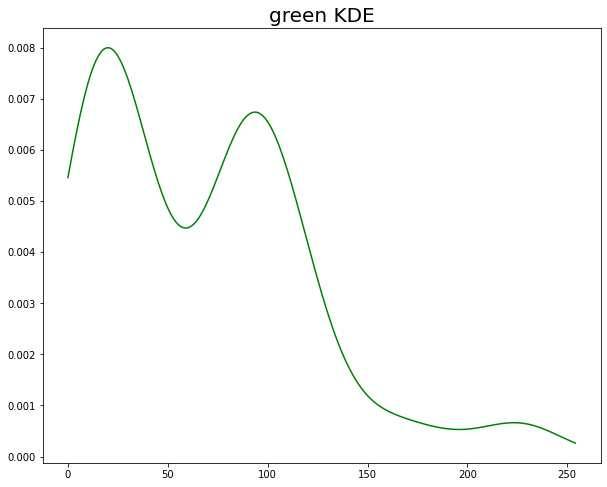

In [23]:
# KDE on green
h_green=find_suitable_bandwith_h(g_hist[0],255)
green_kde_out = np.array([KDE_Gaussian_Kernel(x,g_hist[0],h_green) for x in xdim_kde])
#green_kde_out = np.array([KDE_Gaussian_Kernel(x,img[:,:,1],h_green) for x in xdim_kde])
show_KDE_plot(green_kde_out,'green KDE','g')

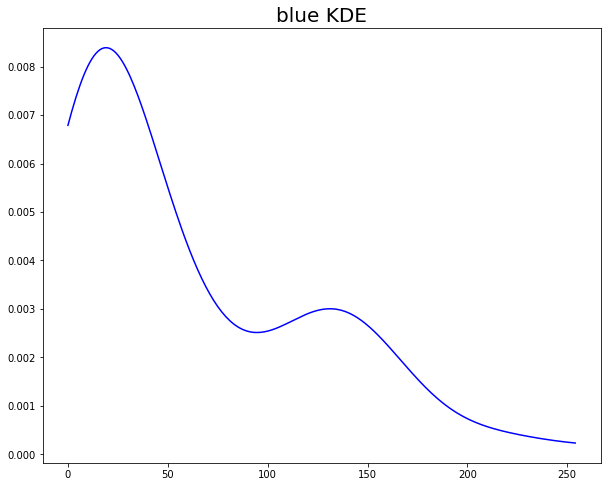

In [24]:
# KDE on blue
h_blue=find_suitable_bandwith_h(b_hist[0],255)
blue_kde_out = np.array([KDE_Gaussian_Kernel(x,b_hist[0],h_blue) for x in xdim_kde])
#blue_kde_out = np.array([KDE_Gaussian_Kernel(x,img[:,:,2],h_blue) for x in xdim_kde])
show_KDE_plot(blue_kde_out,'blue KDE','b')

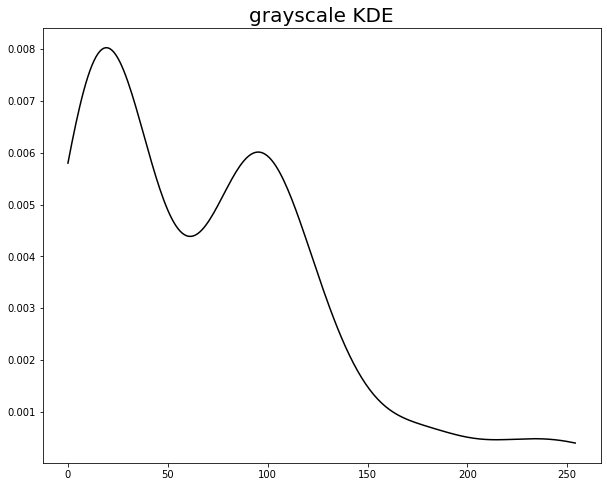

In [25]:
# KDE on grayscale
h_gray=find_suitable_bandwith_h(gray_hist[0],255)
grayscale_kde_out = np.array([KDE_Gaussian_Kernel(x,gray_hist[0],h_gray) for x in xdim_kde])
show_KDE_plot(grayscale_kde_out,'grayscale KDE','k')

In [26]:
def build_cluster_suitable_dtst(x_dim,r_kde,g_kde,b_kde,gray_kde):
  red=np.column_stack([x_dim, r_kde])
  green=np.column_stack([x_dim, g_kde])
  blue=np.column_stack([x_dim, b_kde])
  gray=np.column_stack([x_dim, gray_kde])
  return red,green,blue,gray

In [27]:
# build suitable datasets for meanshift (2D datasets for red green blue channels and also graysacle)
#x-y
red_dst,green_dst,blue_dst,grayscale_dst = build_cluster_suitable_dtst(xdim_kde,red_kde_out,green_kde_out,blue_kde_out,grayscale_kde_out)


In [28]:
STOP_THRESHOLD = 1e-4
#STOP_THRESHOLD = 1
CLUSTER_THRESHOLD = 170
def gaussian_kernel(distance, bandwidth):
    return (1 / (bandwidth * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((distance / bandwidth)) ** 2)

def distance(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))


def shift_point(point, points, kernel_bandwidth):
        shift_x = 0.0
        shift_y = 0.0
        scale = 0.0
        for p in points:
            dist = distance(point, p)
            weight = gaussian_kernel(dist, kernel_bandwidth)
            shift_x += p[0] * weight
            shift_y += p[1] * weight
            scale += weight
        shift_x = shift_x / scale
        shift_y = shift_y / scale
        return [shift_x, shift_y]

def cluster_points(points,CLUSTER_THRESHOLD):
        cluster_ids = []
        cluster_idx = 0
        cluster_centers = []
        avg_dist=0

        for i, point in enumerate(points):
            if(len(cluster_ids) == 0):
                cluster_ids.append(cluster_idx)
                cluster_centers.append(point)
                cluster_idx += 1
            else:
                for center in cluster_centers:
                    dist = distance(point, center)
                    avg_dist+=dist
                    if(dist < CLUSTER_THRESHOLD):
                    
                        cluster_ids.append(cluster_centers.index(center))
                if(len(cluster_ids) < i + 1):
                    cluster_ids.append(cluster_idx)
                    cluster_centers.append(point)
                    cluster_idx += 1
        avg_dist/=(len(cluster_centers)*len(points))
        print('avg_dist   :  ',avg_dist)
        return cluster_ids


def mean_shift(points,kernel_bandwidth,STOP_THRESHOLD,CLUSTER_THRESHOLD):
    count=0
    shifted_pts = np.array(points)
    continue_shifting = [True] * points.shape[0]
    maximum_distance=0
    avg_dest=0
    while True:
        maximum_distance=0
        
        for i,p in enumerate(shifted_pts):
        
            count=count+1
            #print(count)
            if continue_shifting[i]==False:
                    continue
            else:        
                init_point = shifted_pts[i].copy()
                shifted_pts[i] = shift_point(shifted_pts[i], points, kernel_bandwidth)
                dist = distance(shifted_pts[i], init_point)
                avg_dest+=dist
                if dist>=maximum_distance: max_dist=dist
                continue_shifting[i] = dist > STOP_THRESHOLD

            if(max_dist < STOP_THRESHOLD):
                break 
        avg_dest/=count
        #print('avg_dist   :  ',avg_dest)
        cluster_ids = cluster_points(shifted_pts.tolist(),CLUSTER_THRESHOLD)   
        
        return shifted_pts, cluster_ids


In [29]:
def average_clusters(cluster_ids,shifted_pts):
    cluster_ids = np.array(cluster_ids)
    cluster_avgs=[]
    searchvals=set(cluster_ids)
    for id in searchvals:
        avg=0
        index = np.where(cluster_ids == id)[0]
        
        sum=0
        for i in index:
            sum+=shifted_pts[i,0]
            
        avg=floor(sum/len(index))
        print(avg)
        cluster_avgs.append(avg)
    return      np.array(cluster_avgs)

In [30]:
red_shifted=mean_shift(red_dst,h_red,5,121)
cluster_avgs_red=average_clusters(red_shifted[1],red_shifted[0])

green_shifted=mean_shift(green_dst,h_green,40,50)
cluster_avgs_green=average_clusters(green_shifted[1],green_shifted[0])

blue_shifted=mean_shift(blue_dst,h_blue,40,75)
cluster_avgs_blue=average_clusters(blue_shifted[1],blue_shifted[0])

avg_dist   :   51.06069558041861
63
187
251
avg_dist   :   48.21768599894508
32
89
139
189
234
avg_dist   :   43.30045971113894
47
132
207
249


In [31]:
cluster_avgs_red.shape[0],cluster_avgs_green.shape[0],cluster_avgs_blue.shape[0]

(3, 5, 4)

In [32]:
def segment_image(img,red_centroids,green_centroids,blue_centroids):
  no_clusters=red_centroids.shape[0]
  for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
      min_diff_r=1000
      min_diff_g=1000
      min_diff_b=1000
      
      for c in range(0,red_centroids.shape[0]):
        diff_r=abs(img[i,j,0]-red_centroids[c]) 
        #red:
        if diff_r<=min_diff_r :  
          min_diff_r=diff_r
          min_r = red_centroids[c]
      img[i,j,0] = min_r
      
      for c in range(0,green_centroids.shape[0]):
        diff_g=abs(img[i,j,1]-green_centroids[c])
        #green:
        if diff_g<=min_diff_g :  
          min_diff_g=diff_g
          min_g = green_centroids[c]
      img[i, j, 1] = min_g

      for c in range(0,blue_centroids.shape[0]):
        diff_b=abs(img[i,j,2]-blue_centroids[c])
        #blue:
        if diff_b<=min_diff_b :  
          min_diff_b=diff_b
          min_b = blue_centroids[c]
      img[i,j,2]=min_b    

  return np.array(img,dtype=np.int32)


In [33]:
cluster_avgs_green

array([ 32,  89, 139, 189, 234])

In [34]:
img_temp=img.copy()
segmented_img=segment_image(img_temp,cluster_avgs_red,cluster_avgs_green,cluster_avgs_blue)

In [35]:
segmented_img[:,:,1]

array([[32, 32, 32, ..., 32, 32, 32],
       [32, 32, 32, ..., 32, 32, 32],
       [32, 32, 32, ..., 32, 32, 32],
       ...,
       [89, 89, 89, ..., 32, 32, 32],
       [89, 89, 89, ..., 32, 32, 32],
       [89, 89, 89, ..., 32, 32, 32]], dtype=int32)

In [36]:
img[:,:,1]

array([[ 26,  23,  20, ...,  14,  27,  42],
       [ 23,  21,  17, ...,  17,  26,  35],
       [ 13,  12,  11, ...,  22,  28,  31],
       ...,
       [100, 101, 102, ...,  14,  15,  14],
       [ 93,  98,  84, ...,  14,  14,  13],
       [ 91,  95,  82, ...,  14,  14,  13]], dtype=uint8)

In [37]:
(segmented_img[20,0])

array([63, 32, 47], dtype=int32)

In [38]:
segmented_img.shape

(122, 183, 3)

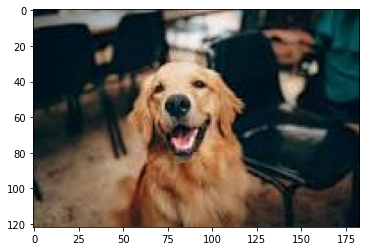

In [39]:
plt.imshow(img)
plt.show()

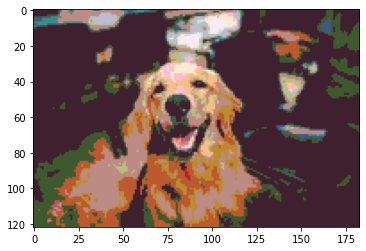

In [40]:
plt.imshow(segmented_img)
plt.show()